# Домашнє завдання до модуля 4: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте бібліотеки matplotlib.pyplot, seaborn та pandas.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
%matplotlib inline

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [4]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [10]:
df_taxi.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [11]:
df_taxi.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [12]:
df_taxi.shape

(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

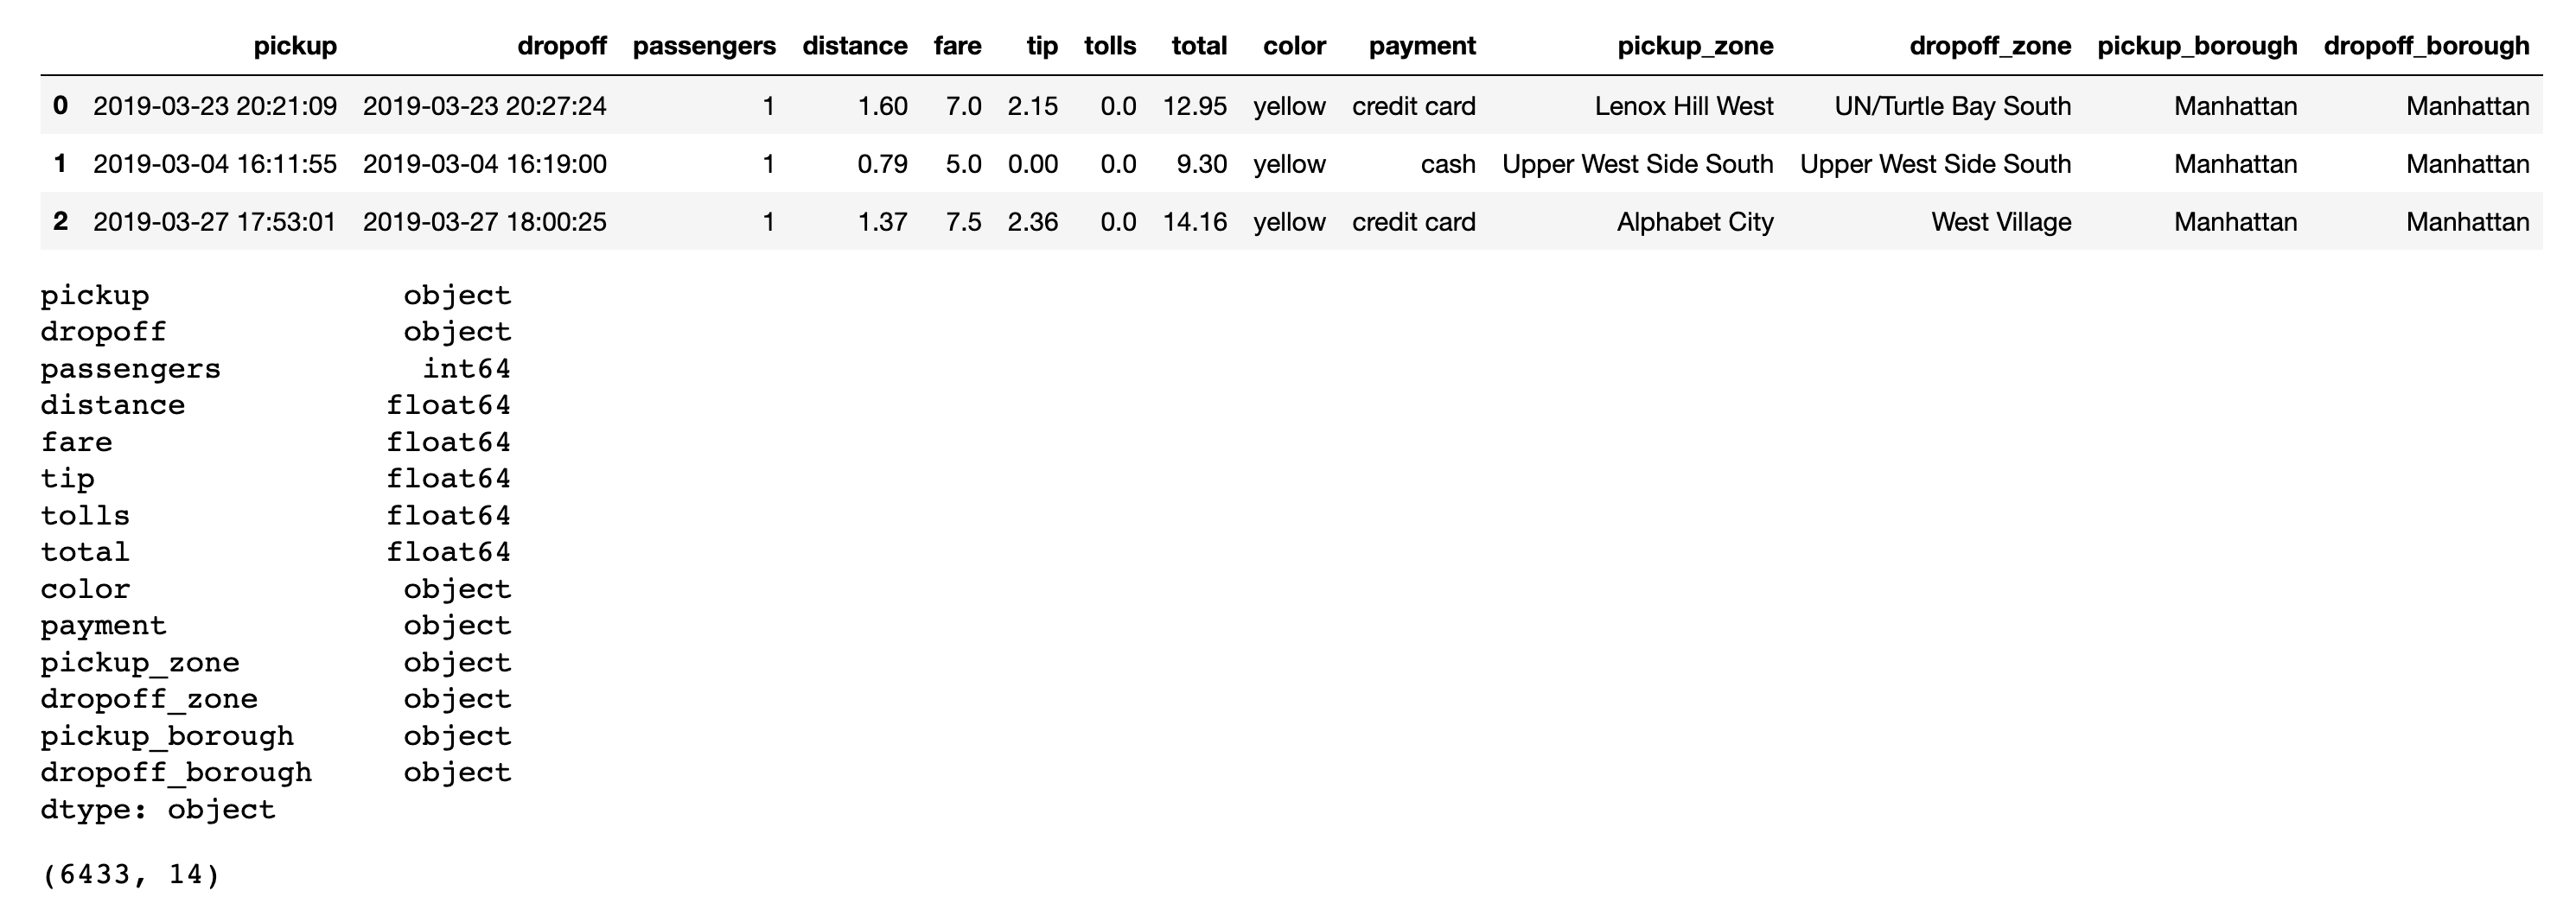

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [16]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

In [21]:
column_max_NA = df_taxi.isna().sum().idxmax()

In [25]:
rows_NA = df_taxi[df_taxi[column_max_NA].isna()]
print(rows_NA)

                  pickup             dropoff  passengers  distance   fare  \
42   2019-03-30 23:59:14 2019-03-30 23:59:17           1      0.00   80.0   
622  2019-03-12 19:52:36 2019-03-12 19:52:55           3      0.00  120.0   
711  2019-03-21 17:39:50 2019-03-21 18:12:54           2      1.74   17.0   
739  2019-03-14 00:09:17 2019-03-14 00:09:21           1      0.03    2.5   
970  2019-03-29 00:02:00 2019-03-29 00:02:05           2      0.00   45.0   
1108 2019-03-10 09:33:13 2019-03-10 09:52:04           1     13.40   52.0   
1112 2019-03-12 19:09:23 2019-03-12 19:20:46           1      0.90    8.5   
1230 2019-03-29 07:52:46 2019-03-29 08:02:40           1      0.90    5.5   
1690 2019-03-22 06:24:14 2019-03-22 06:24:14           1      0.00   72.0   
1787 2019-03-28 06:58:57 2019-03-28 07:18:10           1      6.32   20.5   
2089 2019-03-12 16:21:28 2019-03-12 16:43:40           1      5.69   21.0   
2137 2019-03-08 13:27:32 2019-03-08 13:46:23           1      1.40   12.0   

In [33]:
df_taxi['pickup'] = pd.to_datetime(df_taxi['pickup'])
df_taxi['dropoff'] = pd.to_datetime(df_taxi['dropoff'])

In [41]:
short_trip_rows = df_taxi[df_taxi['dropoff'] - df_taxi['pickup'] < pd.Timedelta(minutes=1)]
print(short_trip_rows)

                  pickup             dropoff  passengers  distance  fare  \
42   2019-03-30 23:59:14 2019-03-30 23:59:17           1      0.00  80.0   
88   2019-03-16 05:08:02 2019-03-16 05:08:20           1      0.07   2.5   
120  2019-03-21 17:21:44 2019-03-21 17:21:49           1      0.00   2.5   
400  2019-03-09 17:26:02 2019-03-09 17:26:10           1      0.90   2.5   
458  2019-03-24 01:08:20 2019-03-24 01:08:34           1      0.02   2.5   
...                  ...                 ...         ...       ...   ...   
6332 2019-03-19 06:57:36 2019-03-19 06:58:15           1      0.08   2.5   
6355 2019-03-16 13:24:04 2019-03-16 13:24:13           1      0.00   2.5   
6356 2019-03-01 16:58:23 2019-03-01 16:58:23           1      0.00   3.0   
6357 2019-03-19 10:43:58 2019-03-19 10:44:07           1      0.00   2.5   
6372 2019-03-20 14:24:28 2019-03-20 14:24:32           1      0.00   2.5   

        tip  tolls   total   color      payment  \
42    20.08    0.0  100.38  yellow  

1)Чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- в нашому масиві відсутні дані для трьох колонок:
dropoff_zone - зона, у якій закінчилась поїздка
pickup_borough - район, у якому почалась поїздка
dropoff_borough - район, у якому закінчилась поїзд
Це може бути пов'язано через відсутність коректної геолакації на території (наприклад, додому до моєї подруги постійно приїзжають таксисти через те, що локація парку встановлена саме на її будинок, а не парк). Можливо через такий баг, окремі зони чи райони посадки/висадки не рахуються. Також деякі пасажири можуть використовувати приватність щодо місць висадки. Або просто технічні збої (типу як зараз з київстаром було, що призвело до збою роботи терміналів)
2)Чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прийишли? Схоже, що пасажир скасував поїздку (в більшості випадків початок і завершення поїздки в одному районі і поїздка менше 1 хвилиника

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [26]:
df_taxi = sns.load_dataset('taxis')
df_taxi_clean = df_taxi.fillna("NA")

Після виконання завдання запустіть наступну клітинку:

In [27]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

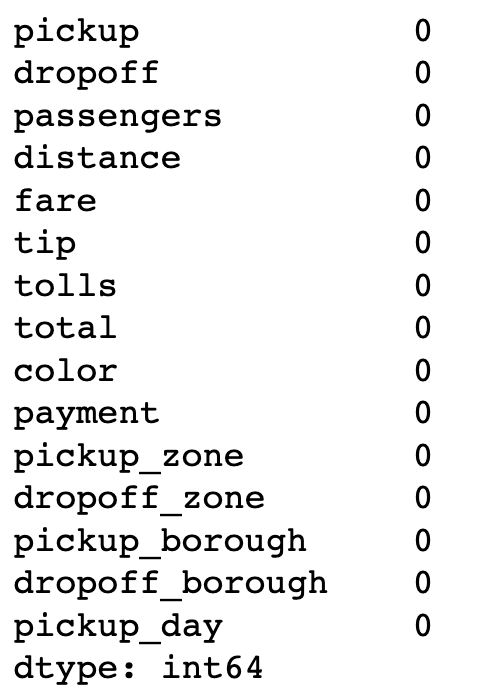

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. 
Якщо у Вас при завантаженні набору даних колонка `pickup`- вже в форматі `datetime64[ns]` - можете пропустити це завдання, або спробувати все ж таки написат функцію для трансформації.

Результат перетворення збережіть в тій самій колонці `pickup`.

In [29]:
df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'], errors='coerce')

Після виконання завдання запустіть наступну клітинку:

In [30]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

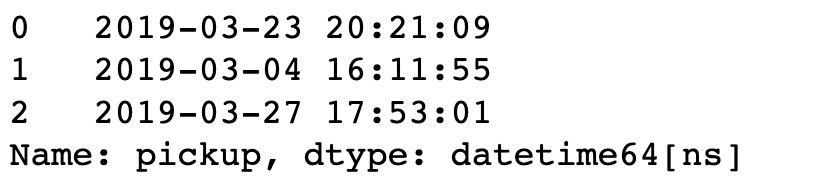

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [42]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. УВАГА! Якщо хочете отримати підписи по осі ОХ як на прикладі, то графік необхідно будувати через `df.plot(...)`. Якщо у Вас будуть інші підписи осі ОХ - це ОК.

Після виведення графіку скажіть, чи бачите щось дивне на ньому? Важливо написати відповідь в цьому завданні словами.

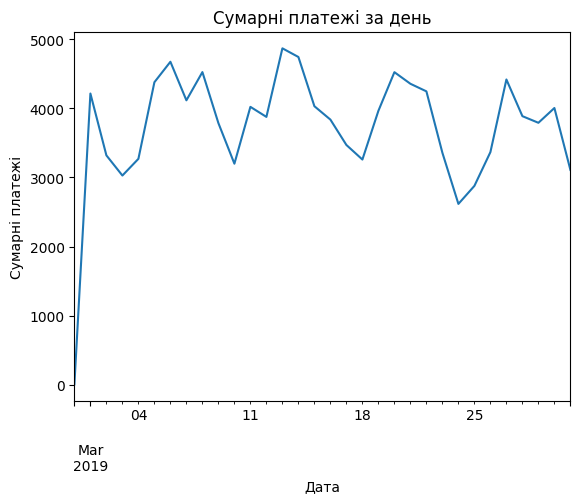

In [44]:
daily_payment = df_taxi_clean.groupby('pickup_day')['total'].sum()
daily_payment.plot(kind='line', linestyle='-')
plt.title('Сумарні платежі за день')
plt.xlabel('Дата')
plt.ylabel('Сумарні платежі')
plt.show()

Відсутність платежів за перший день. Можливо в цей день служба таксі не працювала

Приклад очікуваного графіку:

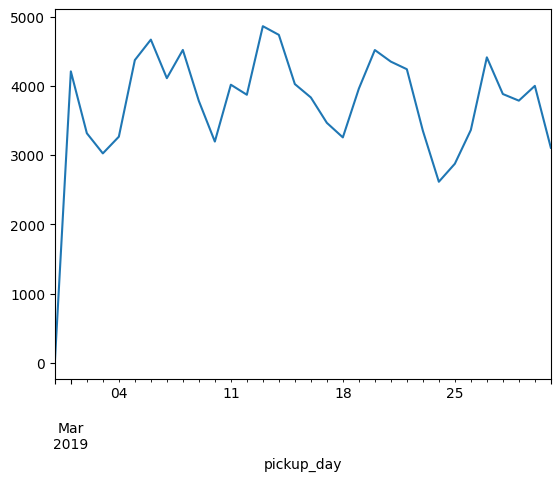

6.Виведіть кількість рядків для кожного pickup_day.

In [45]:
count_per_day = df_taxi_clean['pickup_day'].value_counts()
print(count_per_day)

2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-11    209
2019-03-29    209
2019-03-23    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
2019-02-28      1
Name: pickup_day, dtype: int64


Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

In [66]:
df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup_day'] != '2019-02-28']

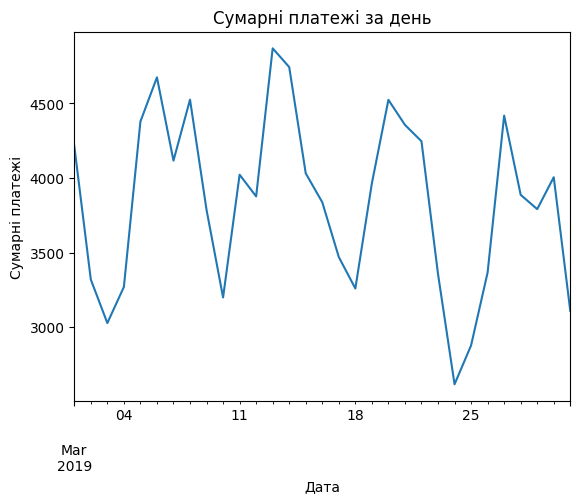

In [67]:
daily_payment = df_taxi_clean.groupby('pickup_day')['total'].sum()
daily_payment.plot(kind='line', linestyle='-')
plt.title('Сумарні платежі за день')
plt.xlabel('Дата')
plt.ylabel('Сумарні платежі')
plt.show()

Очікуваний графік:

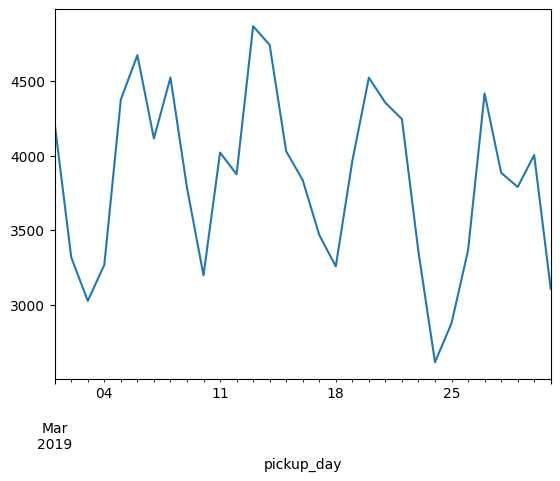

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [93]:
borough_pivot = df_taxi_clean.pivot_table(values='total', index='pickup_day', columns='pickup_borough', aggfunc='sum')

In [94]:
borough_pivot = borough_pivot.drop(columns=['NA'], errors='ignore')

Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

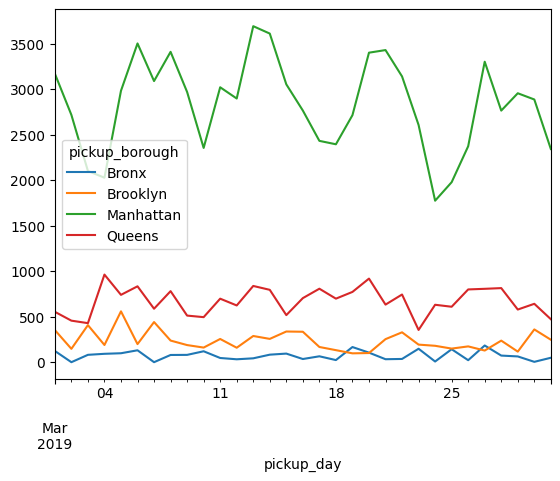

In [95]:
borough_pivot.fillna(0).plot();

Очікуваний графік :

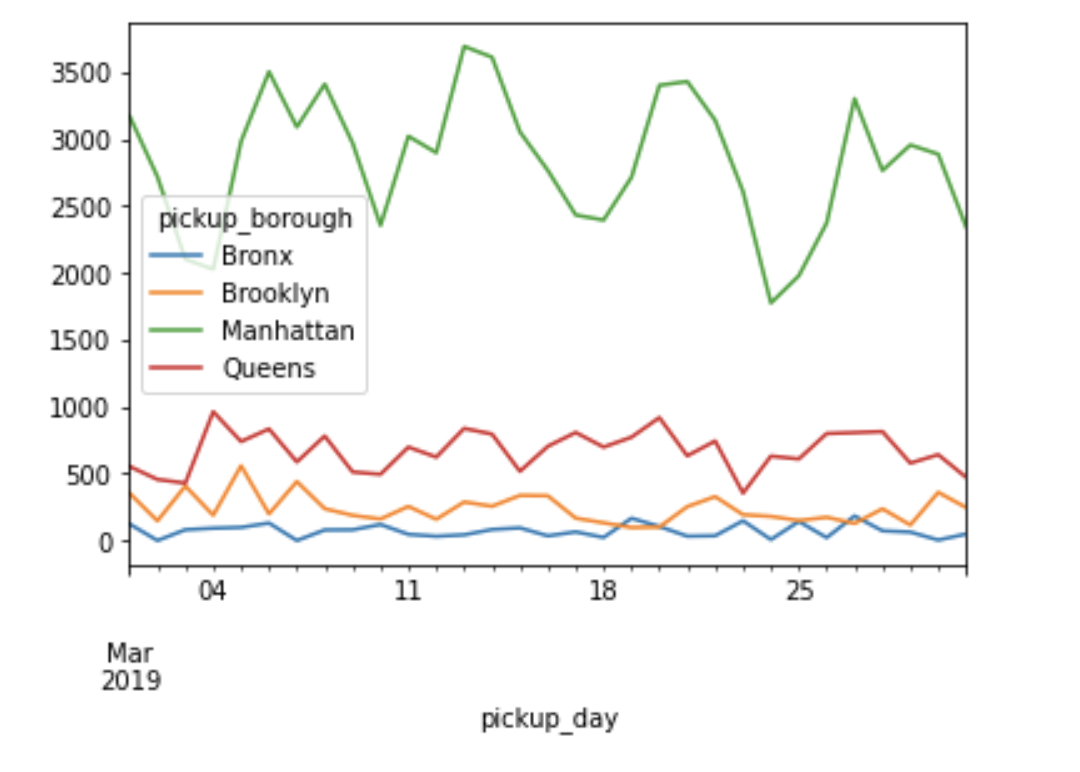

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   

`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot` та побудову графіку через `<назва датафрейму>.<назва графіку>()` - тобто методом датафрейму з пандаса. Але графік можна побудувати також використовуючи цикл. Для тих, хто хоче потренуватись, рекомендую зробити обома способами.

Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

Спрбувала 20 бінів - громізко виходить. Виходячи з кількості платежів, оптимальнім для сприйняття є 5-6 бінів в нашому випадку

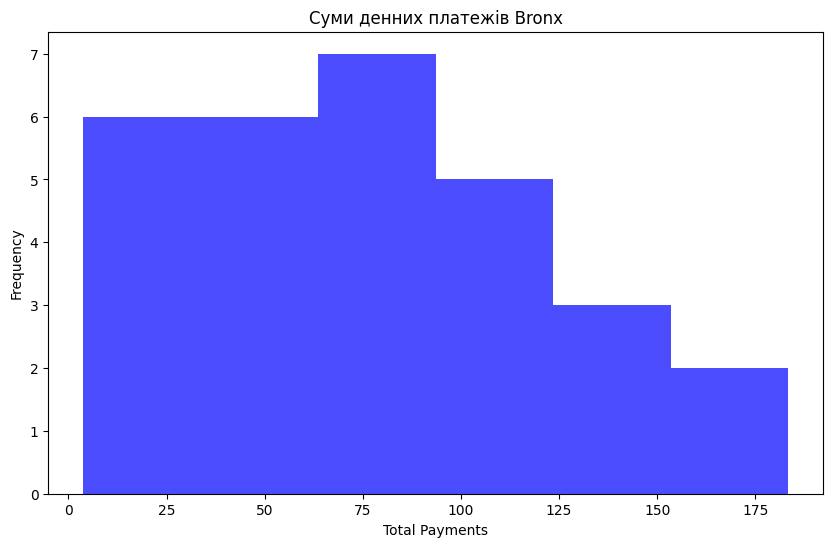

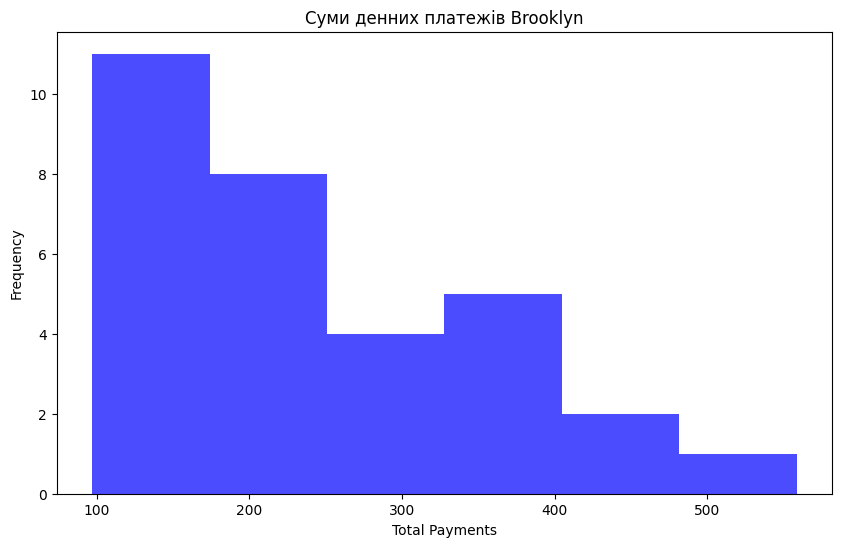

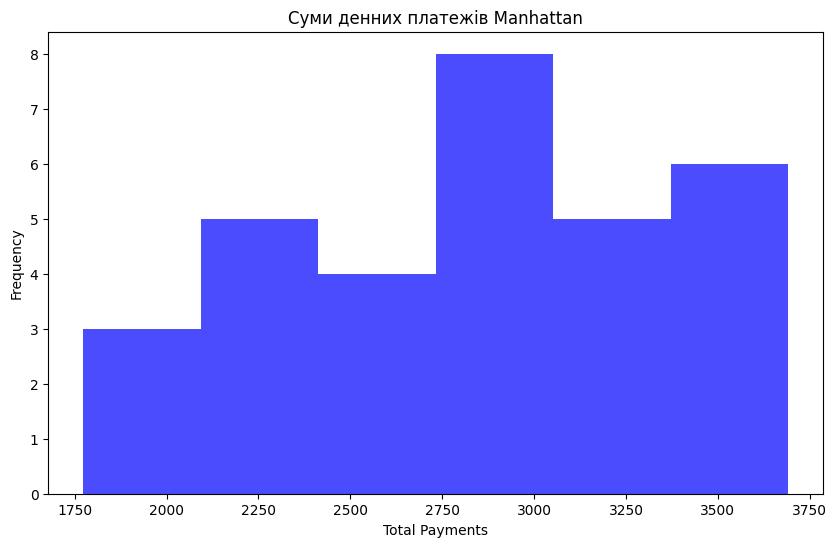

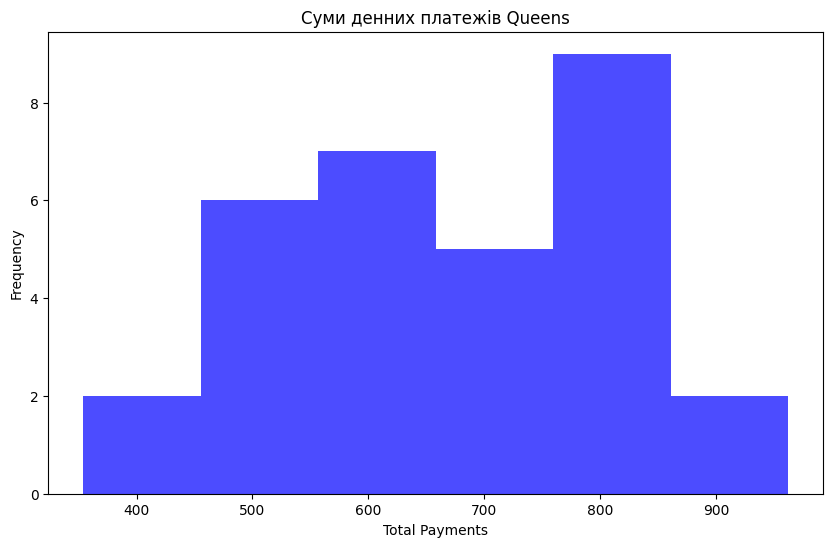

In [109]:
for column in borough_pivot.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(borough_pivot[column], bins=6, color='blue', alpha=0.7)
    plt.title(f'Суми денних платежів {column}')
    plt.xlabel('Total Payments')
    plt.ylabel('Frequency')
    plt.show()

Приклад одного з правильних виконань завдання:

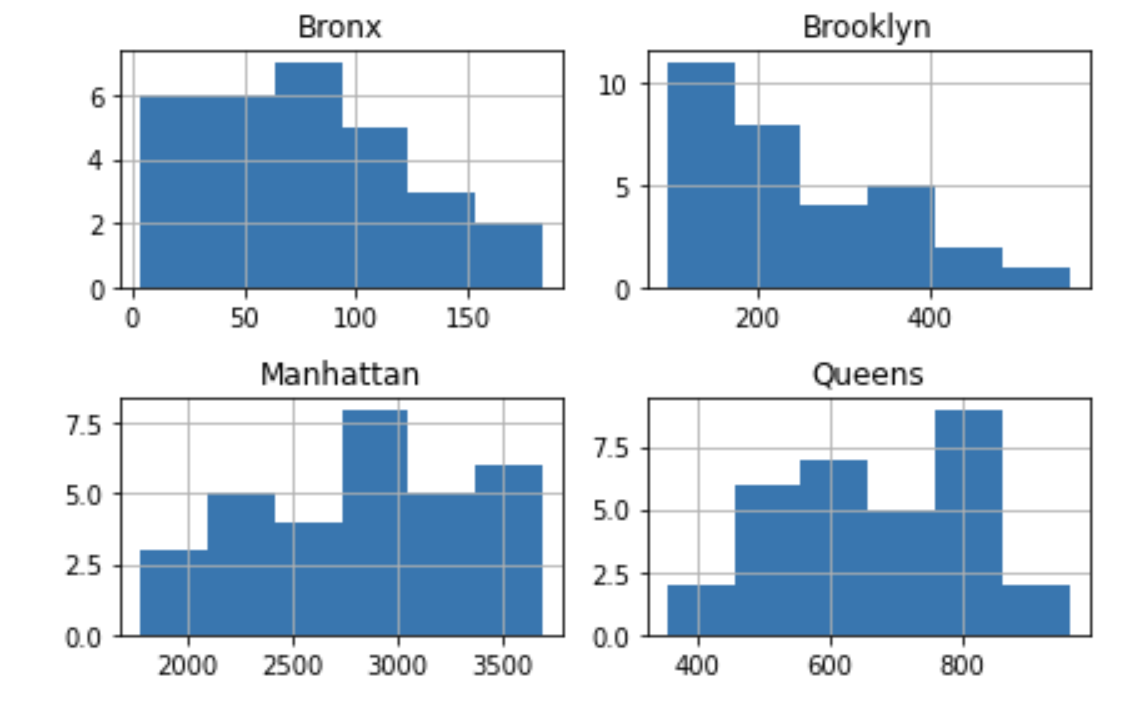

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

In [121]:
sns.set_palette("pastel")

Очікуваний результат:

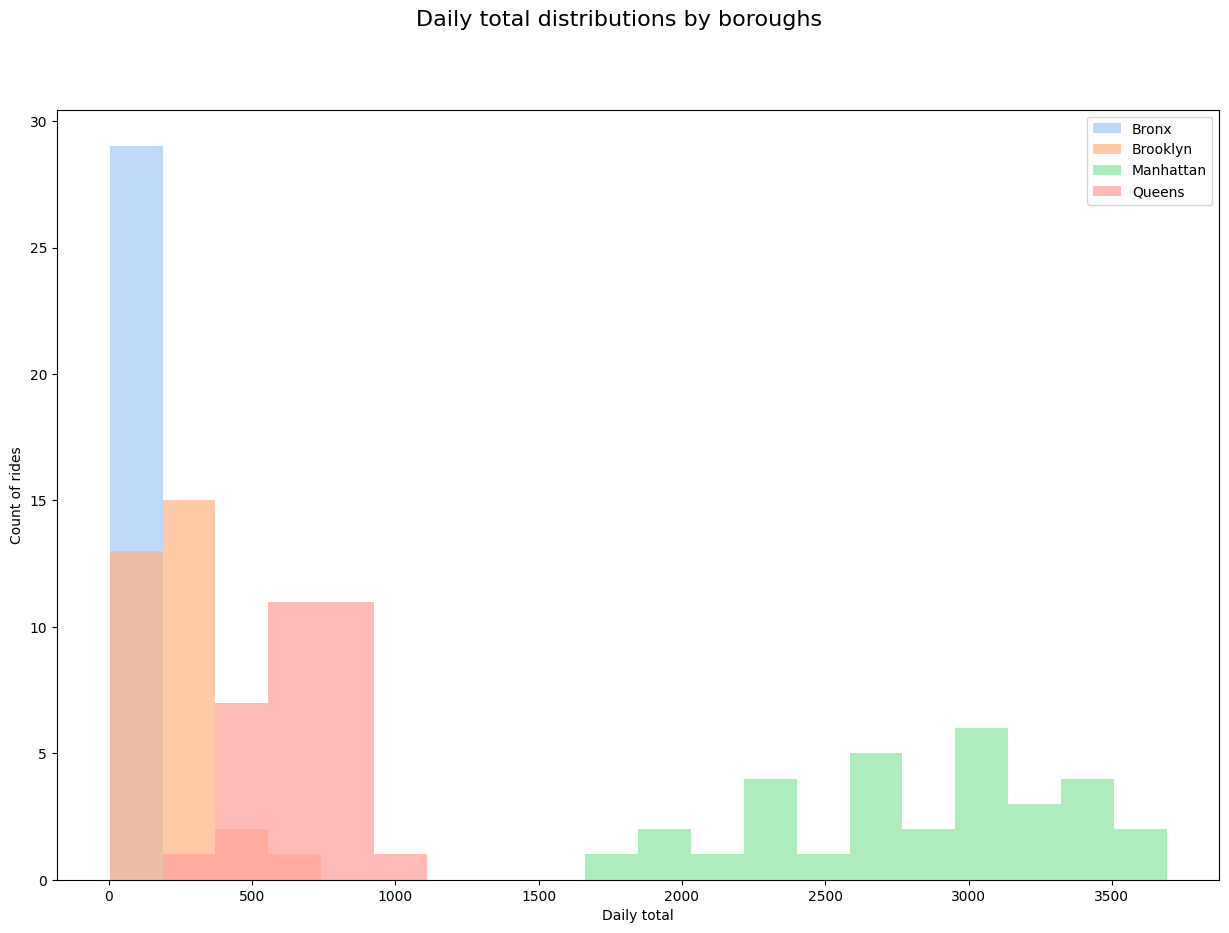

In [126]:
borough_pivot.plot.hist(bins=20, figsize=(15, 10), alpha=0.7, legend=False)
plt.suptitle('Daily total distributions by boroughs', fontsize=16)
plt.xlabel('Daily total')
plt.ylabel('Count of rides')
plt.legend(borough_pivot.columns, loc='upper right')
plt.show()

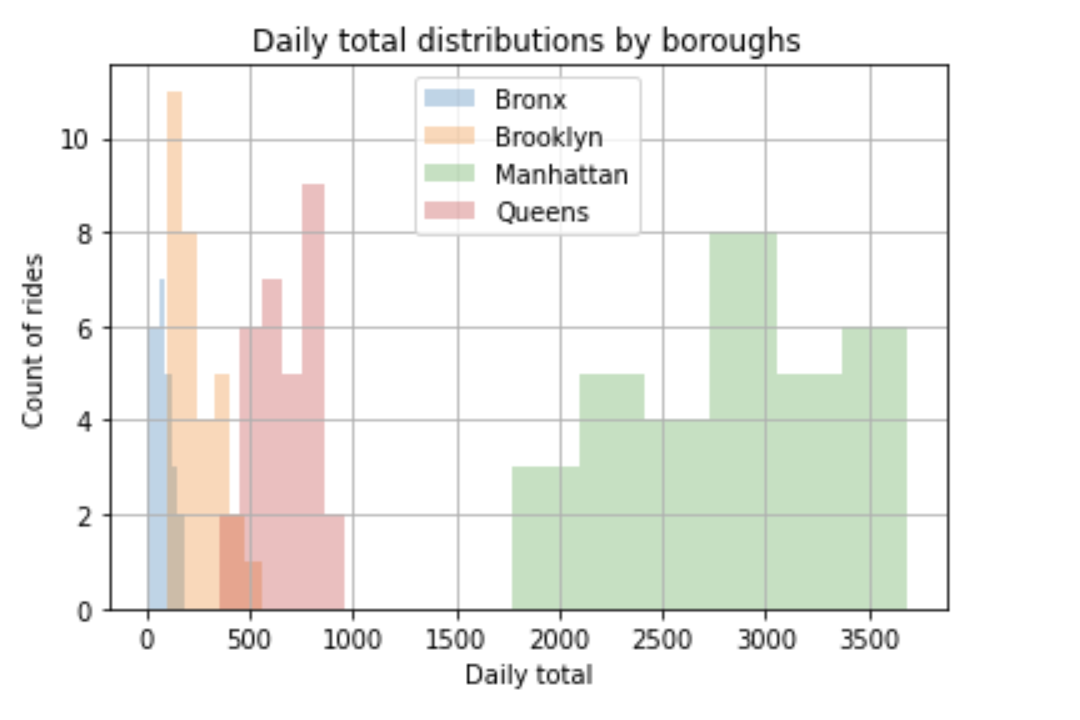

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

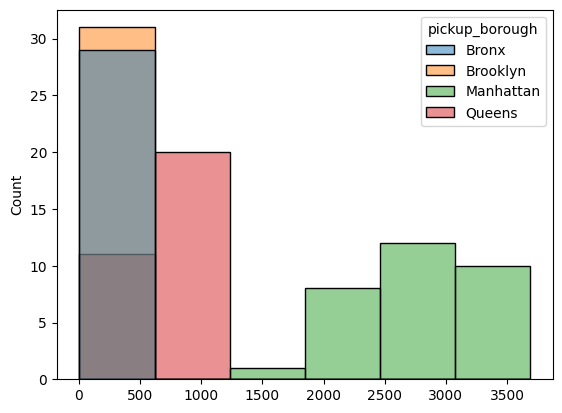

In [114]:
sns.histplot(data=borough_pivot, bins=6);

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

In [135]:
df_taxi_sorted = df_taxi_clean.sort_values(by='color')

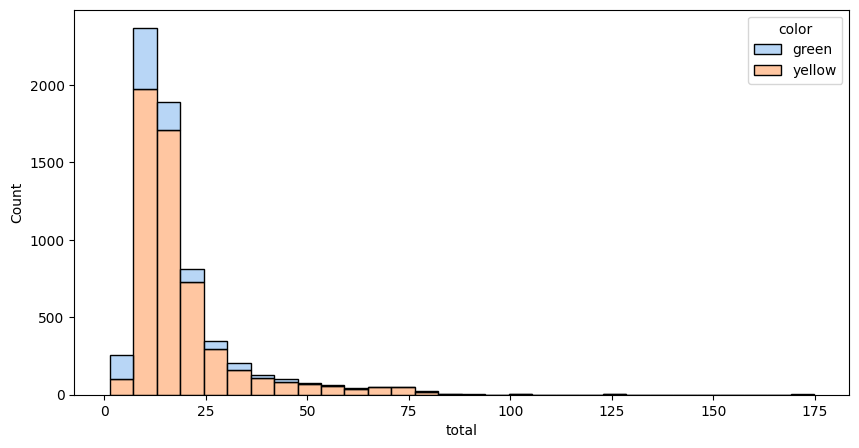

In [159]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(data=df_taxi_sorted, x='total', hue='color', bins=30, multiple='stack', palette='pastel')
plt.show()

Очікуваний результат:

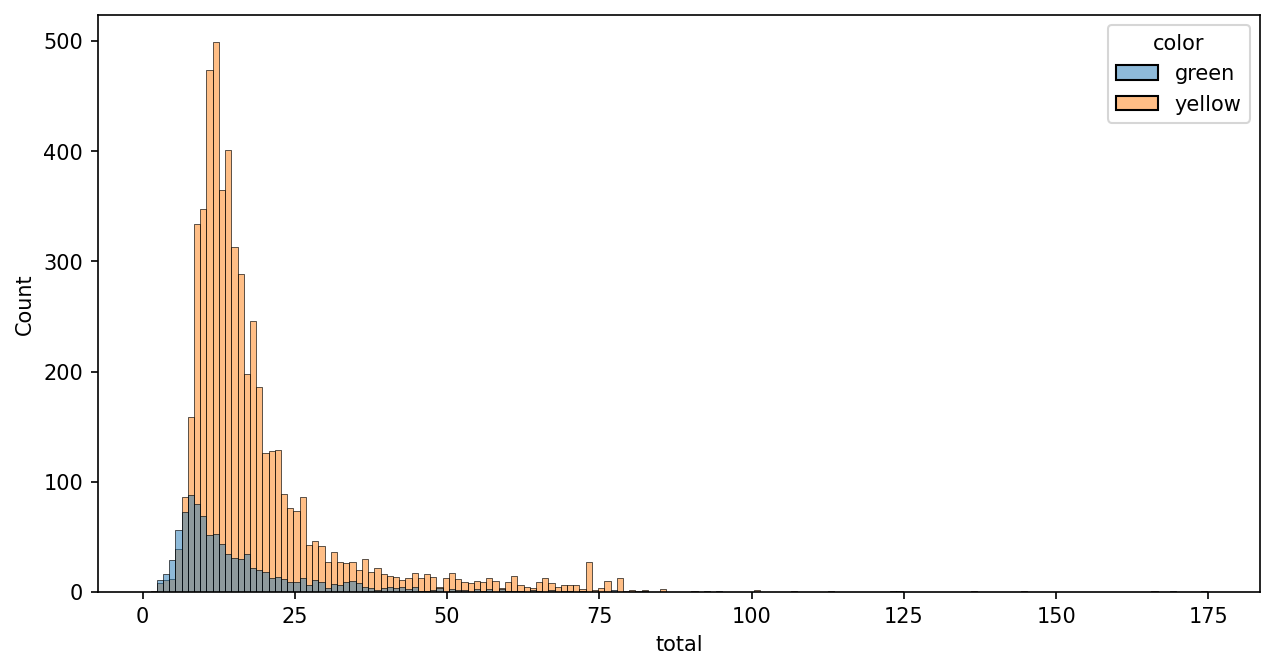

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `line_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

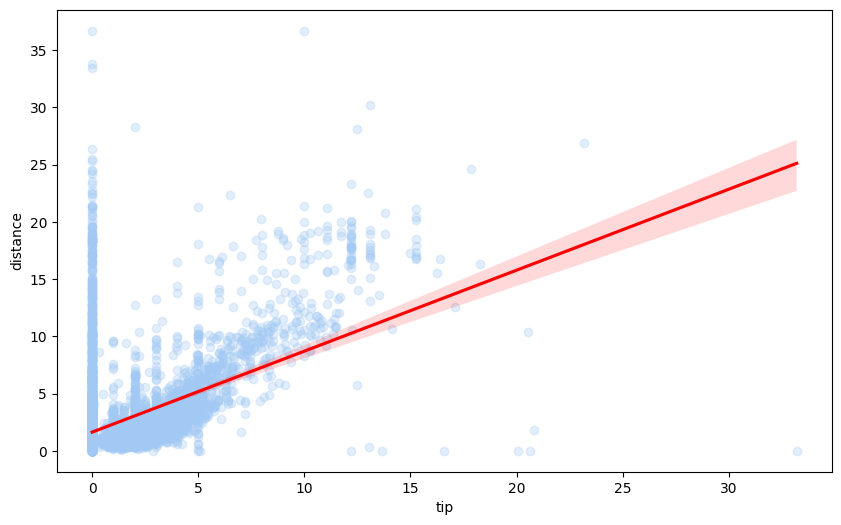

In [158]:
plt.figure(figsize=(10, 6))
sns.regplot(x='tip', y='distance', data=df_taxi_clean, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.show()

Один з можливих результатів (побудовано з seaborn):

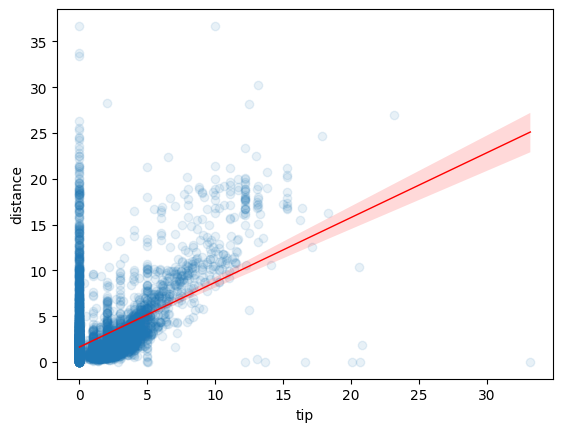

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

In [ ]:
Чим довше відстань поїздки тим быльше розмір чайових

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найнижчий середній розмір** чайових?
- а в поїздках з якого району **найвищий середній розмір** чайових? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

In [155]:
daily_tips_by_borough = df_taxi_clean.groupby(['pickup_day', 'pickup_borough'])['tip'].mean().reset_index()

In [156]:
daily_tips_by_borough = daily_tips_by_borough[daily_tips_by_borough['pickup_borough'] != 'NA']

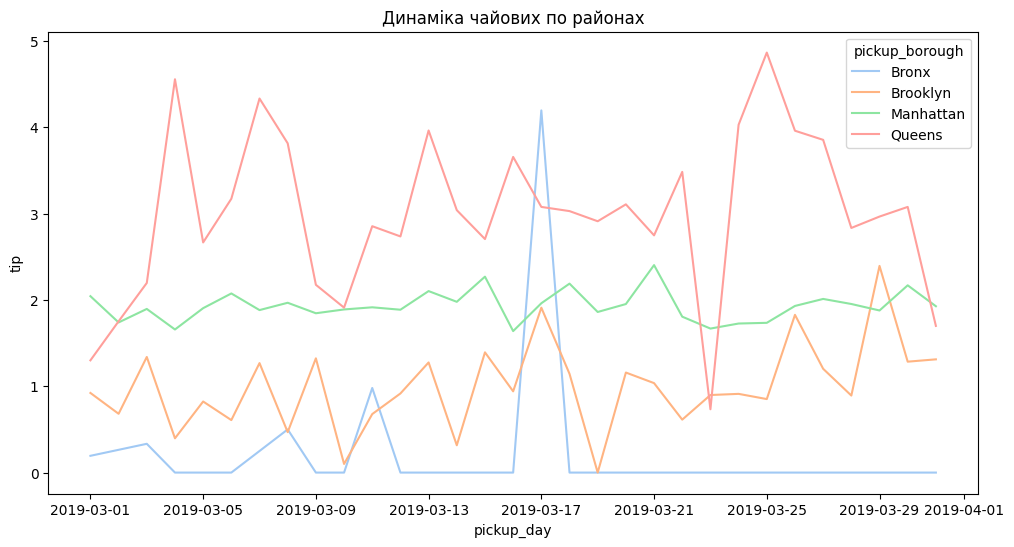

In [157]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_day', y='tip', hue='pickup_borough', data=daily_tips_by_borough)
plt.title('Динаміка чайових по районах')
plt.show()

Дайте відповіді на питання:

при початку поїздки в якому районі найнижчий середній розмір чайових? - Bronx (блакитна лінія)
а в поїздках з якого району найвищий середній розмір чайових? - Квинс
при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)? - Манхетн

Один з можливих результатів (побудовано з seaborn):

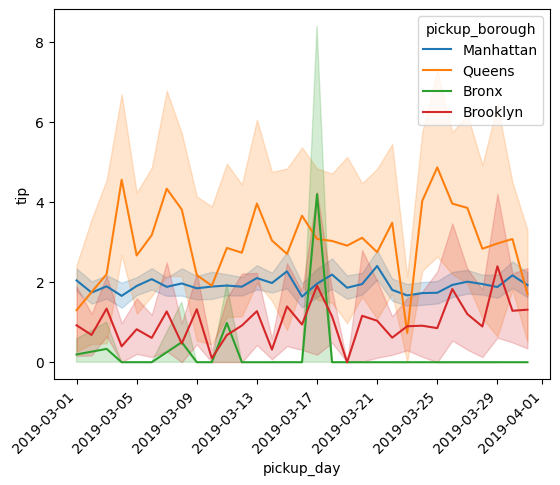

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

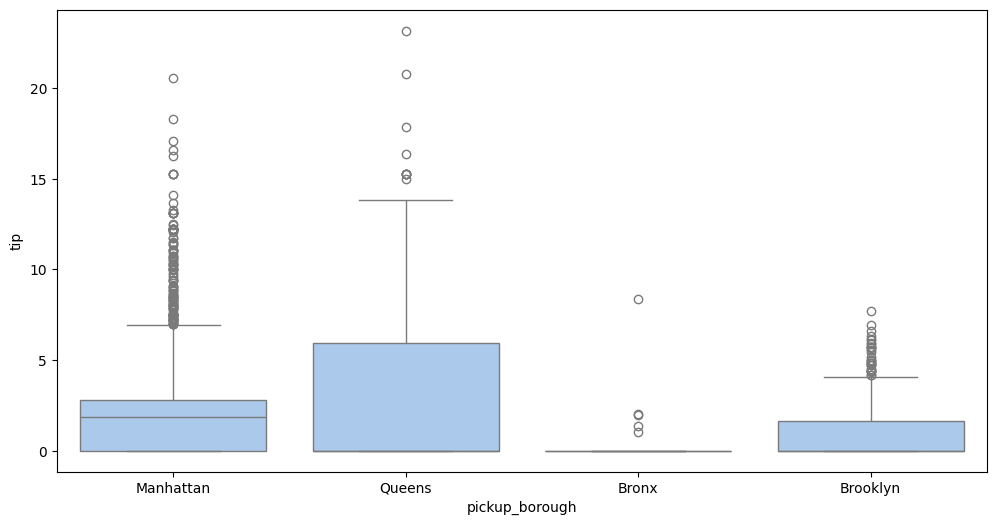

In [166]:
tips_by_borough = df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA']
plt.figure(figsize=(12, 6))
sns.boxplot(x='pickup_borough', y='tip', data=tips_by_borough)
plt.show()

Один з можливих результатів (побудовано з seaborn):

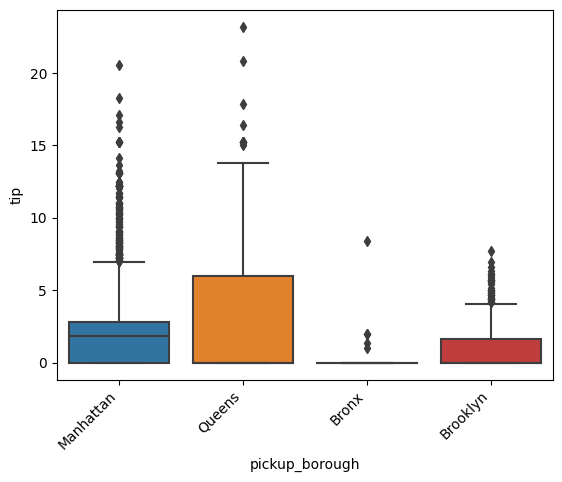

15.Творче завдання. Створіть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

1. Для залучення популярності таксі рівномірно у всі дні, вибираємо в які дні і в яких районах найбільша завантаженість і потім в дні найменшого попиту можна організовувати якісь якції чи знички для заохочення замовлень

In [167]:
df_taxi_clean['pickup_weekday'] = df_taxi_clean['pickup_day'].dt.day_name()

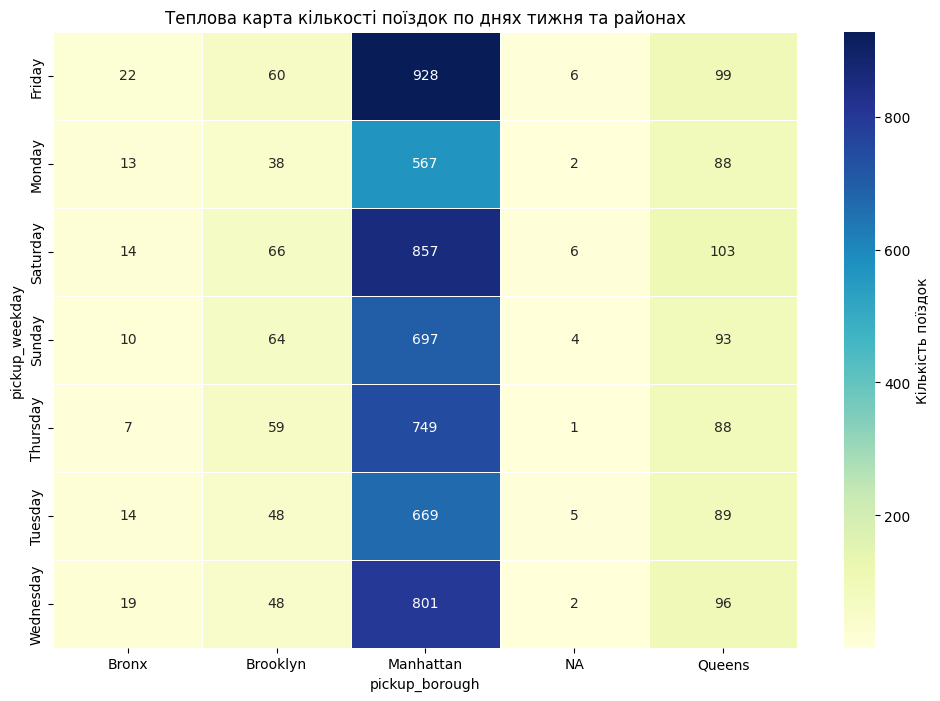

In [168]:
heatmap_data = df_taxi_clean.groupby(['pickup_weekday', 'pickup_borough']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='g', linewidths=.5, cbar_kws={'label': 'Кількість поїздок'})
plt.title('Теплова карта кількості поїздок по днях тижня та районах')
plt.show()

2. Аналізуємо завантаженість по годинам (коли має бути більше машин, також можна коригувати графік робітників таксі залежно від завантаження викликів)

In [173]:
df_taxi_clean['pickup_hour'] = df_taxi_clean['pickup'].dt.hour

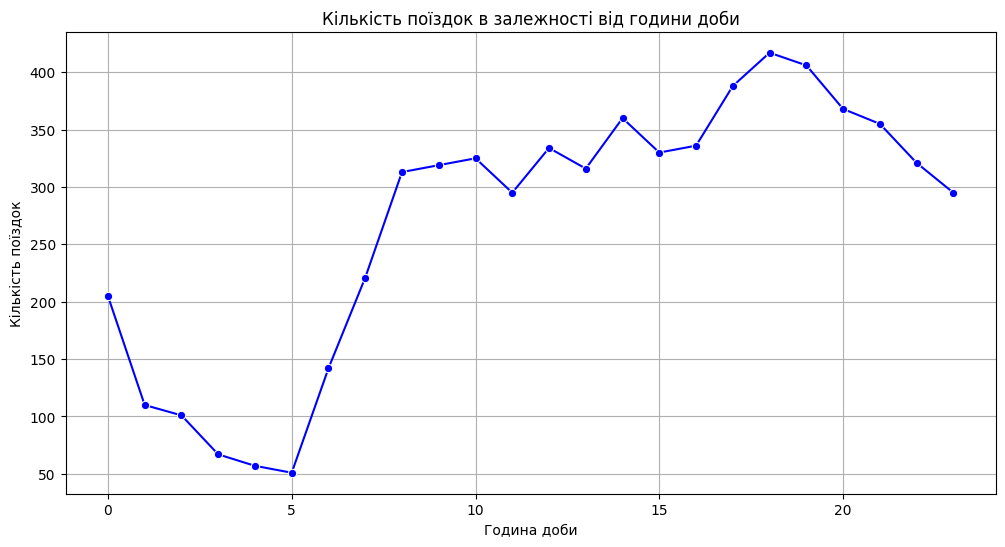

In [175]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, marker='o', linestyle='-', color='b')
plt.title('Кількість поїздок в залежності від години доби')
plt.xlabel('Година доби')
plt.ylabel('Кількість поїздок')
plt.grid(True)
plt.show()

3.Аналізуємо популярність районів при замовленнях, де краще зосередити свій ресур для оперативного реагування на виклики

In [181]:
borough_popularity = df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA']['pickup_borough'].value_counts()

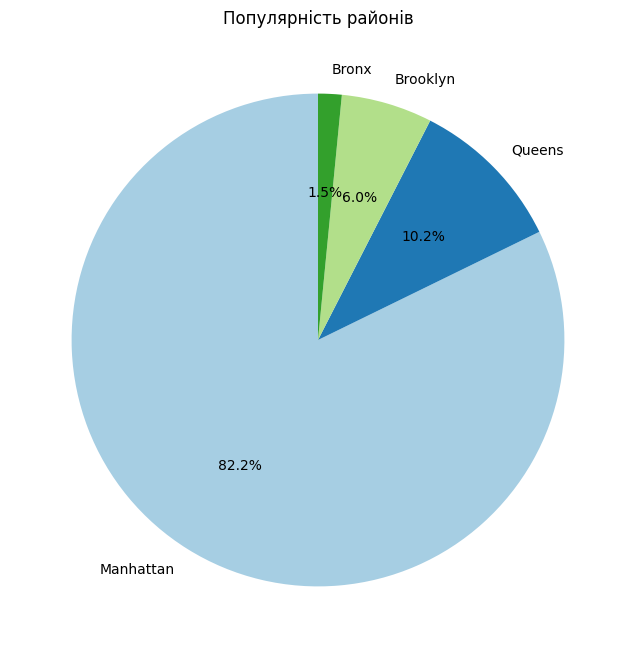

In [182]:
plt.figure(figsize=(8, 8))
plt.pie(borough_popularity, labels=borough_popularity.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Популярність районів')
plt.show()